In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LuizFelipeAG/awaritasks/main/calculadora_aluguel/manipulacao/dados_aluguel_ml_rj_preprocessado.csv')

In [3]:
df.head()

,zona,enderecos_lista,latitude,longitude,area,quartos,aluguel
0,centro,"Rua Senador Dantas, Centro, Rio de Janeiro, RJ",-22.91041,-43.17737,50.0,1.0,970
1,centro,"Rua Das Marrecas, Centro, Rio de Janeiro, RJ",-22.91230,-43.17794,28.0,1.0,1224
2,centro,"Rua De Santana, Centro, Rio de Janeiro, RJ",-22.90892,-43.19369,38.0,1.0,1000
3,centro,"Rua Riachuelo, Centro, Rio de Janeiro, RJ",-22.91353,-43.18043,62.0,2.0,2200
4,centro,"Rua João Neves Da Fontoura, Centro, Rio de Jan...",-22.91777,-43.69936,48.0,2.0,1001


In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
zona,1344,4,centro,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enderecos_lista,1344,675,"Centro, Rio de Janeiro, RJ",205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,1344,NaN,NaN,NaN,-22.9314,0.0414236,-23.0182,-22.9636,-22.9219,-22.9132,-22.7988
longitude,1344,NaN,NaN,NaN,-43.2564,0.0928335,-43.6994,-43.3252,-43.2197,-43.1806,-43.1609
area,1344,NaN,NaN,NaN,138.545,173.342,18,53.75,77,134,1299
quartos,1101,NaN,NaN,NaN,2.05722,0.9002,1,1,2,3,6
aluguel,1344,NaN,NaN,NaN,5125.08,10142.6,500,1343.5,2200,3915,103929


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zona             1344 non-null   object 
 1   enderecos_lista  1344 non-null   object 
 2   latitude         1344 non-null   float64
 3   longitude        1344 non-null   float64
 4   area             1344 non-null   float64
 5   quartos          1101 non-null   float64
 6   aluguel          1344 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 73.6+ KB


In [6]:
df.isna().sum()

zona                 0
enderecos_lista      0
latitude             0
longitude            0
area                 0
quartos            243
aluguel              0
dtype: int64

In [7]:
df['zona'].value_counts()

centro        336
zona-sul      336
zona-norte    336
zona-oeste    336
Name: zona, dtype: int64

<AxesSubplot:>

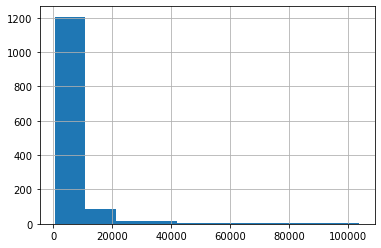

In [8]:
df['aluguel'].hist()

Text(0, 0.5, 'Aluguel')

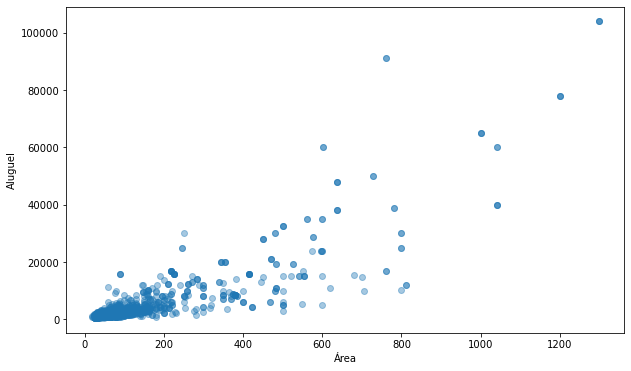

In [9]:
plt.figure(figsize =(10, 6))
plt.scatter(df['area'], df['aluguel'], alpha=0.4)
plt.xlabel('Área')
plt.ylabel('Aluguel')

In [10]:
aluguel_maximo = 40000

In [11]:
df_filtrado = df.query('aluguel<=@aluguel_maximo')

Text(0, 0.5, 'Aluguel')

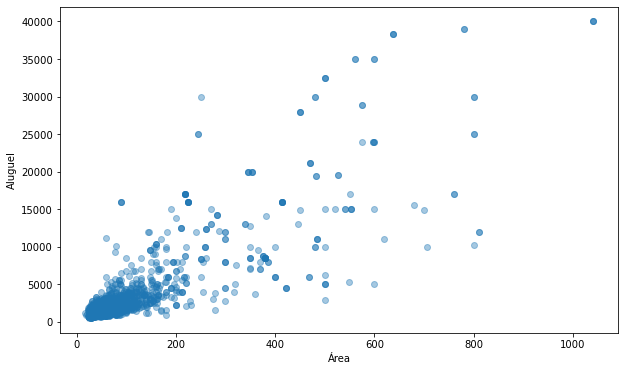

In [12]:
plt.figure(figsize =(10, 6))
plt.scatter(df_filtrado['area'], df_filtrado['aluguel'], alpha=0.4)
plt.xlabel('Área')
plt.ylabel('Aluguel')

<AxesSubplot:>

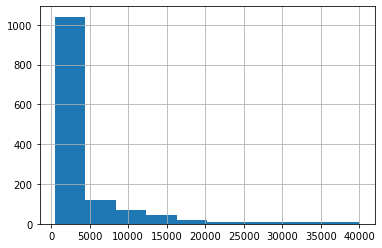

In [13]:
df_filtrado['aluguel'].hist()

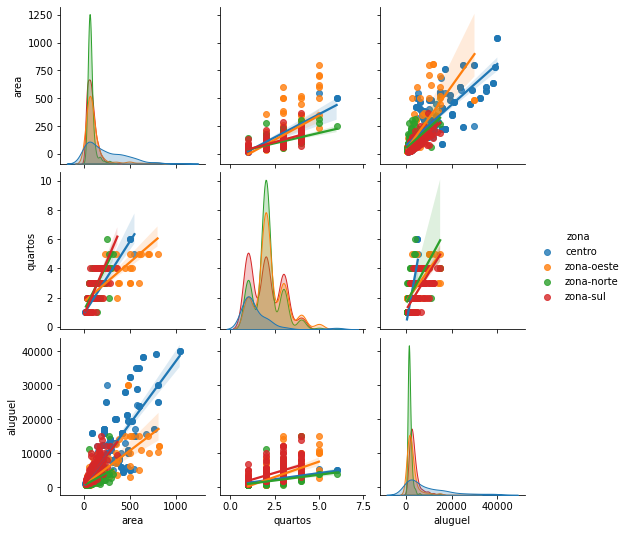

In [14]:
cols = ['zona', 'area', 'quartos', 'aluguel']
df_noaddr = df_filtrado[cols]
sns.pairplot(df_noaddr, kind='reg', hue='zona')

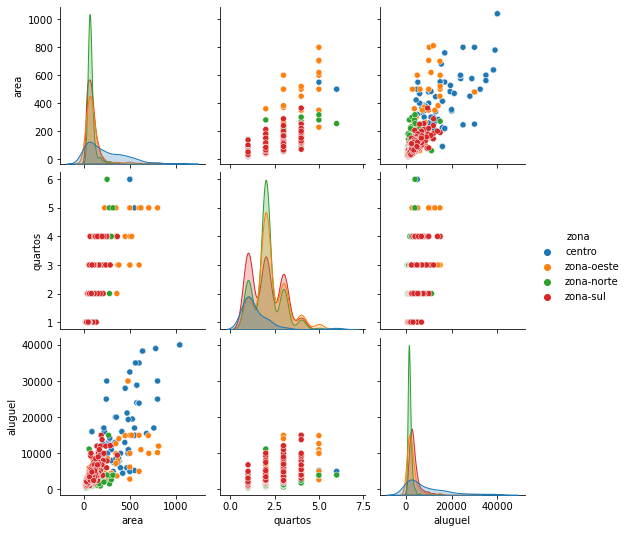

In [15]:
sns.pairplot(df_noaddr, hue='zona')

In [16]:
num_cols = ['area', 'quartos', 'aluguel']

In [21]:
df_log = df_filtrado.copy()

In [22]:
import numpy as np
df_log[num_cols] = df_log[num_cols].apply(np.log1p)

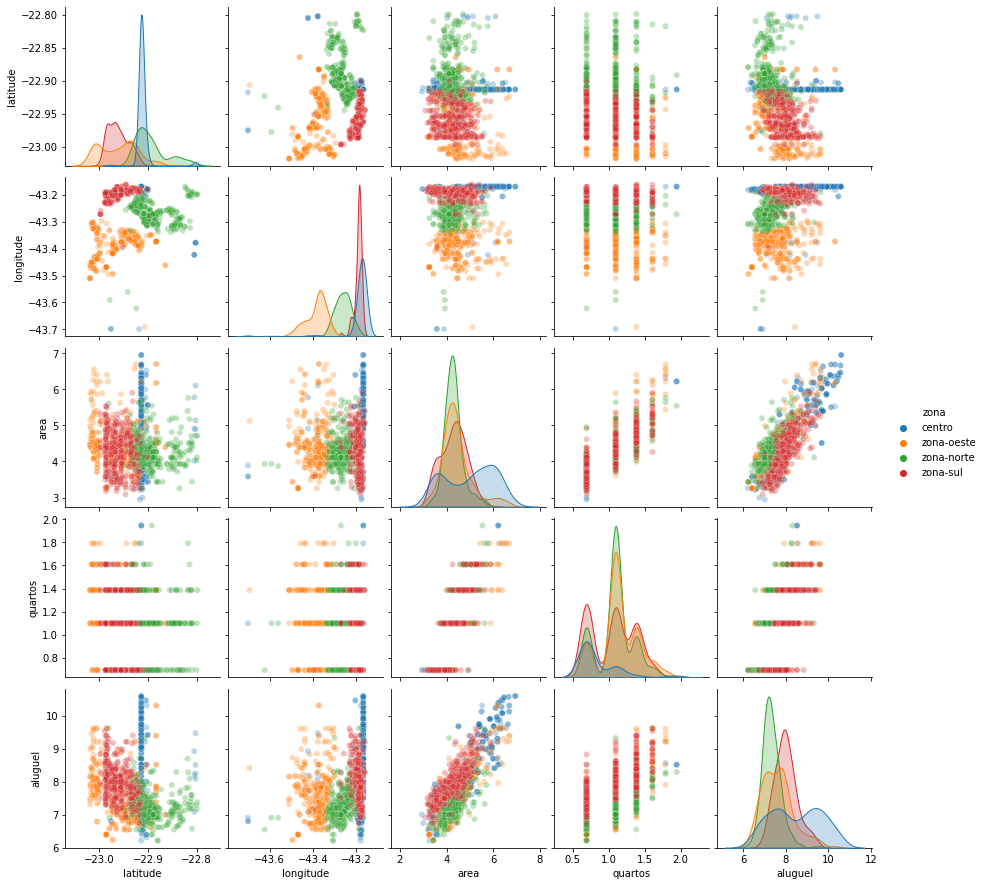

In [24]:
g = sns.pairplot(df_log, hue='zona', plot_kws={'alpha':0.3})

In [25]:
df_filtrado.corr()

,latitude,longitude,area,quartos,aluguel
latitude,1.000000,0.217208,0.064932,-0.140781,0.016018
longitude,0.217208,1.000000,0.175357,-0.152489,0.267348
area,0.064932,0.175357,1.000000,0.697189,0.826892
quartos,-0.140781,-0.152489,0.697189,1.000000,0.540821
aluguel,0.016018,0.267348,0.826892,0.540821,1.000000


<AxesSubplot:>

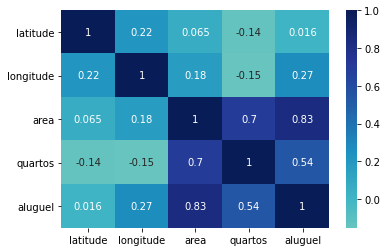

In [26]:
sns.heatmap(df_filtrado.corr(), annot=True, center=0, cmap="YlGnBu")

<AxesSubplot:>

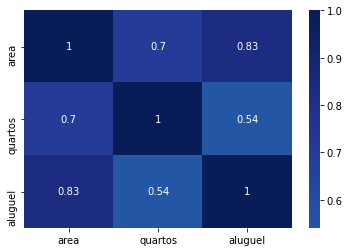

In [27]:
sns.heatmap(df_noaddr.corr(), annot=True, center=0, cmap="YlGnBu")

<AxesSubplot:xlabel='aluguel'>

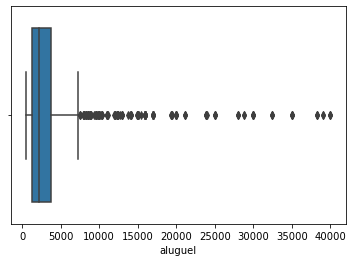

In [28]:
sns.boxplot(x=df_filtrado['aluguel'])

<AxesSubplot:xlabel='zona', ylabel='aluguel'>

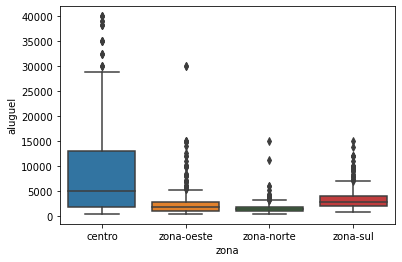

In [29]:
sns.boxplot(x='zona', y='aluguel', data=df_filtrado)

<AxesSubplot:xlabel='zona', ylabel='area'>

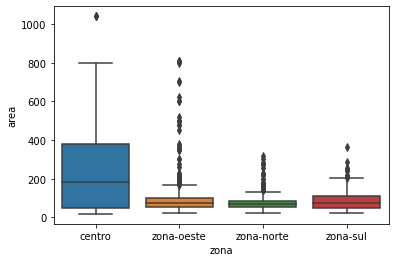

In [30]:
sns.boxplot(x='zona', y='area', data=df_filtrado)